In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


from sklearn.linear_model import HuberRegressor

In [2]:
df = pd.read_csv('./data/bodybrain-weights.csv')
df.head(2)

,body,brain,label
0,36330.0,119.5,Grey wolf
1,3000.0,25.0,Echidna


The goal is to fit and compare three different models.

1. A linear regression on the entire data set
1. A linear regression without the three outliers
1. A linear regression with Huber loss

At the end of the exercise, you will compute estimations of the Encephalization quotient (EQ) of these 65 species which is a theoretical approximate of their intelligence level.

In [3]:
df_reduced = df[np.logical_not(np.logical_and(np.log(df['body']) > 15,np.log(df['brain']) < 6))]
df_outliers = df[np.logical_and(np.log(df['body']) > 15,np.log(df['brain']) < 6)]

# Build data series needed below, using np.log function to linearize data points
x = np.log(df.body.values)
y = np.log(df.brain.values)
z = df.label.values

x_reduced = np.log(df_reduced.body.values)
y_reduced = np.log(df_reduced.brain.values)
z_reduced = df_reduced.label.values

x_outliers = np.log(df_outliers.body.values)
y_outliers = np.log(df_outliers.brain.values)
z_outliers = df_outliers.label.values


x_values = np.linspace(x.min(), x.max(), num=100)

In [4]:
# Linear regression on the whole dataset (deg 2)
coef = np.polyfit(x,y,deg=3)
y_polyfit_all = np.polyval(coef,x_values)


In [5]:
# Linear regression on the reduced dataset (deg 2)
coef = np.polyfit(x_reduced,y_reduced,deg=3)
y_polyfit_reduced = np.polyval(coef,x_values)


In [6]:
# Huber Loss regression approach on the whole dataset
lr_huber = HuberRegressor(epsilon=1.35)
lr_huber.fit(np.c_[x,x**2],y)
y_huber_all = lr_huber.predict(np.c_[x_values,x_values**2])

In [7]:
# Huber Loss regression approach on the whole dataset
lr_huber = HuberRegressor(epsilon=1.35)
lr_huber.fit(np.c_[x_reduced,x_reduced**2],y_reduced)
y_huber_reduced = lr_huber.predict(np.c_[x_values,x_values**2])

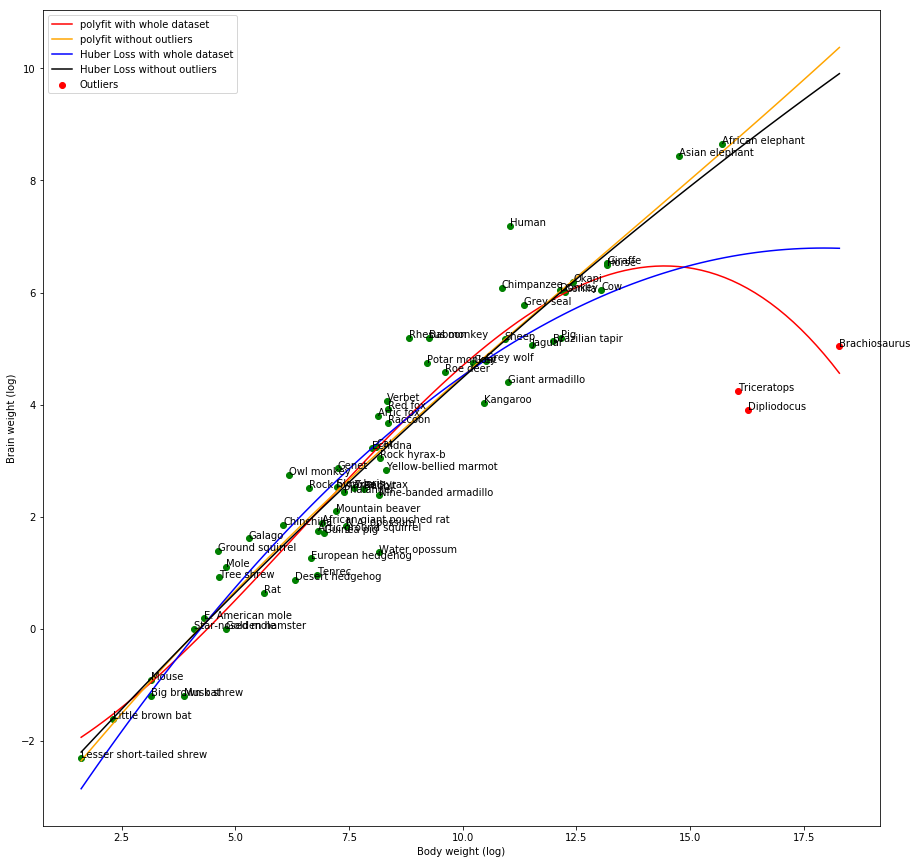

In [8]:
# Draw the graph
fig, ax = plt.subplots(figsize=(15,15))

# Draw reduced scatter plot
ax.scatter(x_reduced,y_reduced, c='green',)
for i, txt in enumerate(z_reduced):
    ax.annotate(txt, (x_reduced[i], y_reduced[i]))

# Draw outliers scatter plot
ax.scatter(x_outliers,y_outliers, c='red', label='Outliers')
for i, txt in enumerate(z_outliers):
    ax.annotate(txt, (x_outliers[i], y_outliers[i]))

    
ax.plot(x_values,y_polyfit_all,c='red',label='polyfit with whole dataset')
ax.plot(x_values,y_polyfit_reduced,c='orange',label='polyfit without outliers')
ax.plot(x_values,y_huber_all,c='blue',label='Huber Loss with whole dataset')
ax.plot(x_values,y_huber_reduced,c='black',label='Huber Loss without outliers')

plt.xlabel("Body weight (log)")
plt.ylabel("Brain weight (log)")
plt.legend(loc='upper left')
plt.show()

## Evaluate  Encephalization quotient

Snell's equation of simple allometry is:[citation needed]

    E = C S**(2/3) => C = E / (S**(2/3))

Here "E" is the weight of the brain, "C" is the cephalization factor and "S" is body weight and "r" is the exponential constant.

The "encephalization quotient" (EQ) is the coefficient "C" in Snell's allometry equation, usually normalized with respect to a reference species.


In [11]:
# Calculate Encephalization quotient normalized against the Cat EQ

df = df.set_index('label')
df['EQ'] = (df['brain'] / ((df['body']/1000)**(2/3)))

df['Normalized against Cat EQ'] = df['EQ']/df.loc['Cat','EQ']


# Here is the Top 5 most intelligent species defined by the EQ
df.sort_values('EQ',ascending=False).head(5)




,body,brain,EQ,Normalized against Cat EQ
label,,,,
Human,62000.0,1320.0,84.264789,7.295955
Rhesus monkey,6800.0,179.0,49.870887,4.318004
Baboon,10550.0,179.5,37.316091,3.230964
Chimpanzee,52160.0,440.0,31.518167,2.728959
Owl monkey,480.0,15.5,25.283520,2.189140
